###### Name: Zeeshan Haleem

###### Email Id: zeeshanhaleemamu@gmail.com 

### Deep learning with Tensorflow

In this project, we will see how a Deep learning methodology with the help of a python module Tensorflow has been used to model the time series (sequential) dataset.

### RNN-LSTM 


A recurrent neural network is a type of Artificial neural network commonly used in Natural language processing, Speech recognization, stock price prediction, etc where data's characteristic is in sequential. It is basically using feedback loops to process sequential data thus, it holds a long-short term memory and carries forward it to the final output layer. Therefore, it is known as the RNN-LSTM model.

### Project Title: Tesla price prediction

###### Objective:

In this task we will predict the closing price of the stock market prices of the Tesla using RNN-LSTM model.

#### Importing modules required for building RNN-LSTM model

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

###### Downloding data direct from Yahoo finance website.

In [4]:
import yfinance as yf

In [5]:
df=yf.download('TSLA', start='2015-07-10', end='2020-07-10')

[*********************100%***********************]  1 of 1 completed


In [7]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


###### Spliting dataset into Training and testing part, in aprroximat 7:3 ratio. 

In [14]:
training_set = df.iloc[:800,4:5].values
test_set=df.iloc[800:,4:5].values

In [15]:
training_set

array([[51.58399963],
       [51.83000183],
       [52.43199921],
       [53.13000107],
       [52.62799835],
       [53.33599854],
       [54.93199921],
       [56.45199966],
       [53.35400009],
       [53.57400131],
       [53.43999863],
       [53.08200073],
       [50.60200119],
       [52.9640007 ],
       [52.76399994],
       [53.35800171],
       [53.22999954],
       [51.9980011 ],
       [53.25600052],
       [54.02600098],
       [49.22600174],
       [48.5019989 ],
       [48.22800064],
       [47.47399902],
       [47.63399887],
       [48.5019989 ],
       [48.63000107],
       [50.9980011 ],
       [52.14400101],
       [51.04999924],
       [48.43600082],
       [46.15399933],
       [43.77399826],
       [44.00600052],
       [44.9679985 ],
       [48.59799957],
       [49.69599915],
       [49.81200027],
       [47.72600174],
       [49.5379982 ],
       [49.11399841],
       [48.38600159],
       [49.63399887],
       [49.7820015 ],
       [49.69599915],
       [50

###### Normalizing the Training dataset and reshaping into 3 -Dimension

In [16]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

###### Prepare the test data (reshape them into 3-Dimension)

In [17]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 4:5]
dataset_test = df.iloc[800:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


###### Applying RNN-LSTM model on Training data set

In [18]:
model = Sequential()             #The 1st LSTM layer and some Dropout regularisation 0.2
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))          # The 2nd LSTM layer and some Dropout regularisation 0.2
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))          #  The 3rd LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))          # The 4th LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))          # Now adding the final output layer
model.add(Dense(units = 1))

# Compiling the RNN-model.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Now Fitting the RNN-LSTM model to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 15s 119ms/step - loss: 0.1168
Epoch 2/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0185
Epoch 3/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0127
Epoch 4/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0109
Epoch 5/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0124
Epoch 6/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0122
Epoch 7/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0112
Epoch 8/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0110
Epoch 9/100
24/24 [==============================] - 3s 111ms/step - loss: 0.0096
Epoch 10/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0106
Epoch 11/100
24/24 [==============================] - 3s 111ms/step - loss: 0.0094
Epoch 12/100
24/24 [==============================] - 3s 111ms/step - loss: 0.0094
Epoch 13/100

###### Make Predictions using the test set

In [19]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

###### Create dataframe of the predicted price alongwith test dataset.  

In [20]:
pred=pd.DataFrame(predicted_stock_price, columns=['Pred'])
# pred

In [21]:
test=dataset_test.reset_index(drop=True)
# test

In [22]:
date=df.loc[800:, 'Date']
date=pd.DataFrame(date)
date=date.reset_index(drop=True)
# date

In [23]:
pr_data=pd.concat([date, test,pred],axis=1)

In [24]:
pr_data

,Date,Close,Pred
0,2018-09-11,55.888000,57.073540
1,2018-09-12,58.108002,57.699554
2,2018-09-13,57.891998,58.952831
3,2018-09-14,59.040001,59.944798
4,2018-09-17,58.967999,60.749039
...,...,...,...
455,2020-07-02,241.731995,120.084335
456,2020-07-06,274.316010,123.242180
457,2020-07-07,277.971985,126.437859
458,2020-07-08,273.175995,124.503998


#### Visualising the results

In [38]:
plt.style.use('classic')

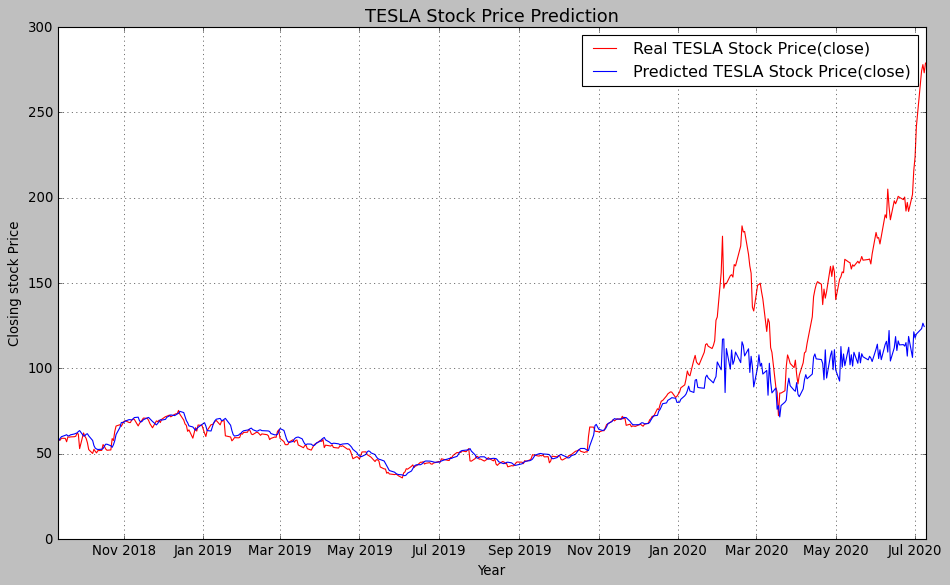

In [47]:
# Visualising the results
plt.figure(figsize=(14,8))
plt.plot(pr_data['Date'],pr_data['Close'],color = 'r', label = 'Real TESLA Stock Price(close)')
plt.plot(pr_data['Date'],pr_data['Pred'], color = 'b', label = 'Predicted TESLA Stock Price(close)')
plt.title('TESLA Stock Price Prediction', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Closing stock Price')
plt.legend()
plt.grid()
plt.show()
